# Tiny ImageNet

## Imports

In [1]:
import sys 
import numpy as np 
import matplotlib.pyplot as plt


import torch
import torchvision 
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler

sys.path.insert(0, '../src_code')

import models
from train import *
from metrics import * 
from data_downloaders import * 

print("Python: %s" % sys.version)
print("Pytorch: %s" % torch.__version__)

# determine device to run network on (runs on gpu if available)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


Python: 3.6.5 (default, Jun 21 2018, 23:07:39) 
[GCC 5.4.0 20160609]
Pytorch: 0.4.0


## Hyperparameters

In [2]:
n_epochs = 50
batch_size = 128
lr = 0.001
k = 3


## Load Tiny ImageNet
### https://tiny-imagenet.herokuapp.com/

Tiny ImageNet already downloaded.


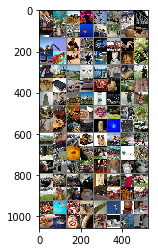

In [3]:
get_tiny_imagenet()

train_dir = "../datasets/tiny-imagenet-200/train"
test_dir = "../datasets/tiny-imagenet-200/val"


# Data augmentation 
train_transform = torchvision.transforms.Compose([
    #torchvision.transforms.RandomRotation(10),
    #torchvision.transforms.RandomHorizontalFlip(),
    #torchvision.transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
 
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = torchvision.transforms.Compose([
    #torchvision.transforms.Pad(2),
    torchvision.transforms.ToTensor(),
    #torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])
    



# load training set 
trainset = torchvision.datasets.ImageFolder(train_dir, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# load test set 
testset = torchvision.datasets.ImageFolder(test_dir, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

# helper function to unnormalize and plot image 
def imshow(img):
    img = np.array(img)
    img = img / 2 + 0.5
    img = np.moveaxis(img, 0, -1)
    plt.imshow(img)
    
# display sample from dataset 
imgs,labels = iter(trainloader).next()
imshow(torchvision.utils.make_grid(imgs))  

## Train Model 

In [4]:
net = models.tiny_cnn(n_in=3, n_out=200, n_hidden=128, size=64).to(device)

net.apply(models.weights_init)

loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=lr)

In [5]:
train(net, trainloader, testloader, optimizer, loss, n_epochs, verbose=True)

[0/50][0/782] loss = 6.429205
[0/50][1/782] loss = 108.826042
[0/50][2/782] loss = 99.104660
[0/50][3/782] loss = 106.563492
[0/50][4/782] loss = 125.764259
[0/50][5/782] loss = 131.857605
[0/50][6/782] loss = 142.333710
[0/50][7/782] loss = 141.921890
[0/50][8/782] loss = 151.474808
[0/50][9/782] loss = 166.661560
[0/50][10/782] loss = 149.003387
[0/50][11/782] loss = 138.293732
[0/50][12/782] loss = 118.798950
[0/50][13/782] loss = 124.948311
[0/50][14/782] loss = 115.892509
[0/50][15/782] loss = 110.489532
[0/50][16/782] loss = 106.142662
[0/50][17/782] loss = 102.177834
[0/50][18/782] loss = 90.023849
[0/50][19/782] loss = 98.856300
[0/50][20/782] loss = 92.466133
[0/50][21/782] loss = 100.748825
[0/50][22/782] loss = 91.058426
[0/50][23/782] loss = 96.408958
[0/50][24/782] loss = 83.273743
[0/50][25/782] loss = 87.853279
[0/50][26/782] loss = 87.241676
[0/50][27/782] loss = 87.652946
[0/50][28/782] loss = 99.849197
[0/50][29/782] loss = 90.964249
[0/50][30/782] loss = 87.876221


Process Process-4:
Process Process-3:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 57, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 57, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.6/site-packages/torchvision/datasets/folder.py", line 101, in __getitem__
    sample = self.loader(path)
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*se

[0/50][31/782] loss = 86.721909


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7efd58cd6550>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 347, in __del__
    def __del__(self):
  File "/usr/local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 178, in handler
    _error_if_any_worker_fails()
RuntimeError: DataLoader worker (pid 80282) exited unexpectedly with exit code 1.


KeyboardInterrupt: 